In [1]:
import pandas as pd

data = pd.read_csv('booking.csv')

Я буду предсказывать отмену бронирования номеров в отеле. Данные были взяты с kaggle.com: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data 

Исследовательский вопрос будет звучать так: с помощью какой модели можно наиболее качественно предсказать отмены бронирований в отеле?

Независимые переменные касаются содержания и деталей брони:<br> количество взрослых, количество детей, количество ночей в рабочие дни, количество ночей в выходные, тип питания, тип номера, необходиомсть парковки, количество предыдущих отмен, количество предыдущих броней без отмен, количество дней между бронированием и заселением, способ бронирования (онлайн, оффлайн), повторное бронирование или нет, цена брони, количество особых запросов, дата бронирование                               <br> <br>Целевая переменная: <br>статус бронирования (отменено или нет)

Как мы видим, среди независимых переменных: 6 категориальных переменных (включая дату бронирования), 9 числовых переменных (и которых только одна непрерывная, остальные дискретные) <br> Теперь посмотрим описательные статистики

In [2]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


Перекодируем переменные, записанные словами

In [3]:
data['type of meal'].value_counts()

Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: type of meal, dtype: int64

In [4]:
data['type of meal'] = data['type of meal'].apply(lambda x: 0 if x == 'Not Selected' else (1 if x == 'Meal Plan 1' else (2 if x == 'Meal Plan 2' else 3)))

In [5]:
data['type of meal'].value_counts()

1    27842
0     5132
2     3306
3        5
Name: type of meal, dtype: int64

In [6]:
data['room type'].value_counts()

Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room type, dtype: int64

In [7]:
data['room type'] = data['room type'].apply(lambda x: x[-1])

In [8]:
data['room type'].value_counts()

1    28138
4     6059
6      966
2      692
5      265
7      158
3        7
Name: room type, dtype: int64

In [9]:
data['market segment type'].value_counts()

Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: market segment type, dtype: int64

In [10]:
data['market segment type'] = data['market segment type'].apply(lambda x: 0 if x == 'Offline' else (1 if x == 'Online' else (2 if x == 'Corporate' else (3 if x == 'Complementary' else 4))))

In [11]:
data['market segment type'].value_counts()

1    23221
0    10531
2     2017
3      391
4      125
Name: market segment type, dtype: int64

дату перекодирую по сезонам - может быть сезонный фактор отмен бронирования

In [12]:
data['month'] = data['date of reservation'].apply(lambda x: int(x[:(x.find('/'))]) if x.find('/') >= 1 else 2)

In [13]:
data['month'].value_counts()

10    5320
9     4612
8     3813
6     3203
12    3022
11    2981
7     2921
4     2737
5     2599
3     2358
2     1705
1     1014
Name: month, dtype: int64

In [14]:
data['season'] = data['month'].apply(lambda x: 1 if (1 <= x <= 2) or (x == 12) else (2 if 3 <= x <= 5 else (3 if 6 <= x <= 8 else 4)))

In [15]:
data['season'].value_counts()

4    12913
3     9937
2     7694
1     5741
Name: season, dtype: int64

In [16]:
data['booking status'].value_counts()

Not_Canceled    24396
Canceled        11889
Name: booking status, dtype: int64

In [17]:
data['booking status'] = data['booking status'].apply(lambda x: 0 if x == 'Not_Canceled' else 1)

In [18]:
data['booking status'].value_counts()

0    24396
1    11889
Name: booking status, dtype: int64

In [19]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status', 'month', 'season'],
      dtype='object')

In [20]:
data = data.drop(['Booking_ID', 'date of reservation', 'month'], axis = 1)

Гистограммы по переменным: <br> Можно заметить, что целевая переменная несбалансированная. Также почти нет изменчивости по предыдущим бронированиям, отмененным предыдущим бронированиям и повторности бронирования, но я не думаю, что это причина удалять переменные.

array([[<AxesSubplot:title={'center':'number of adults'}>,
        <AxesSubplot:title={'center':'number of children'}>,
        <AxesSubplot:title={'center':'number of weekend nights'}>,
        <AxesSubplot:title={'center':'number of week nights'}>],
       [<AxesSubplot:title={'center':'type of meal'}>,
        <AxesSubplot:title={'center':'car parking space'}>,
        <AxesSubplot:title={'center':'lead time'}>,
        <AxesSubplot:title={'center':'market segment type'}>],
       [<AxesSubplot:title={'center':'repeated'}>,
        <AxesSubplot:title={'center':'P-C'}>,
        <AxesSubplot:title={'center':'P-not-C'}>,
        <AxesSubplot:title={'center':'average price'}>],
       [<AxesSubplot:title={'center':'special requests'}>,
        <AxesSubplot:title={'center':'booking status'}>,
        <AxesSubplot:title={'center':'season'}>, <AxesSubplot:>]],
      dtype=object)

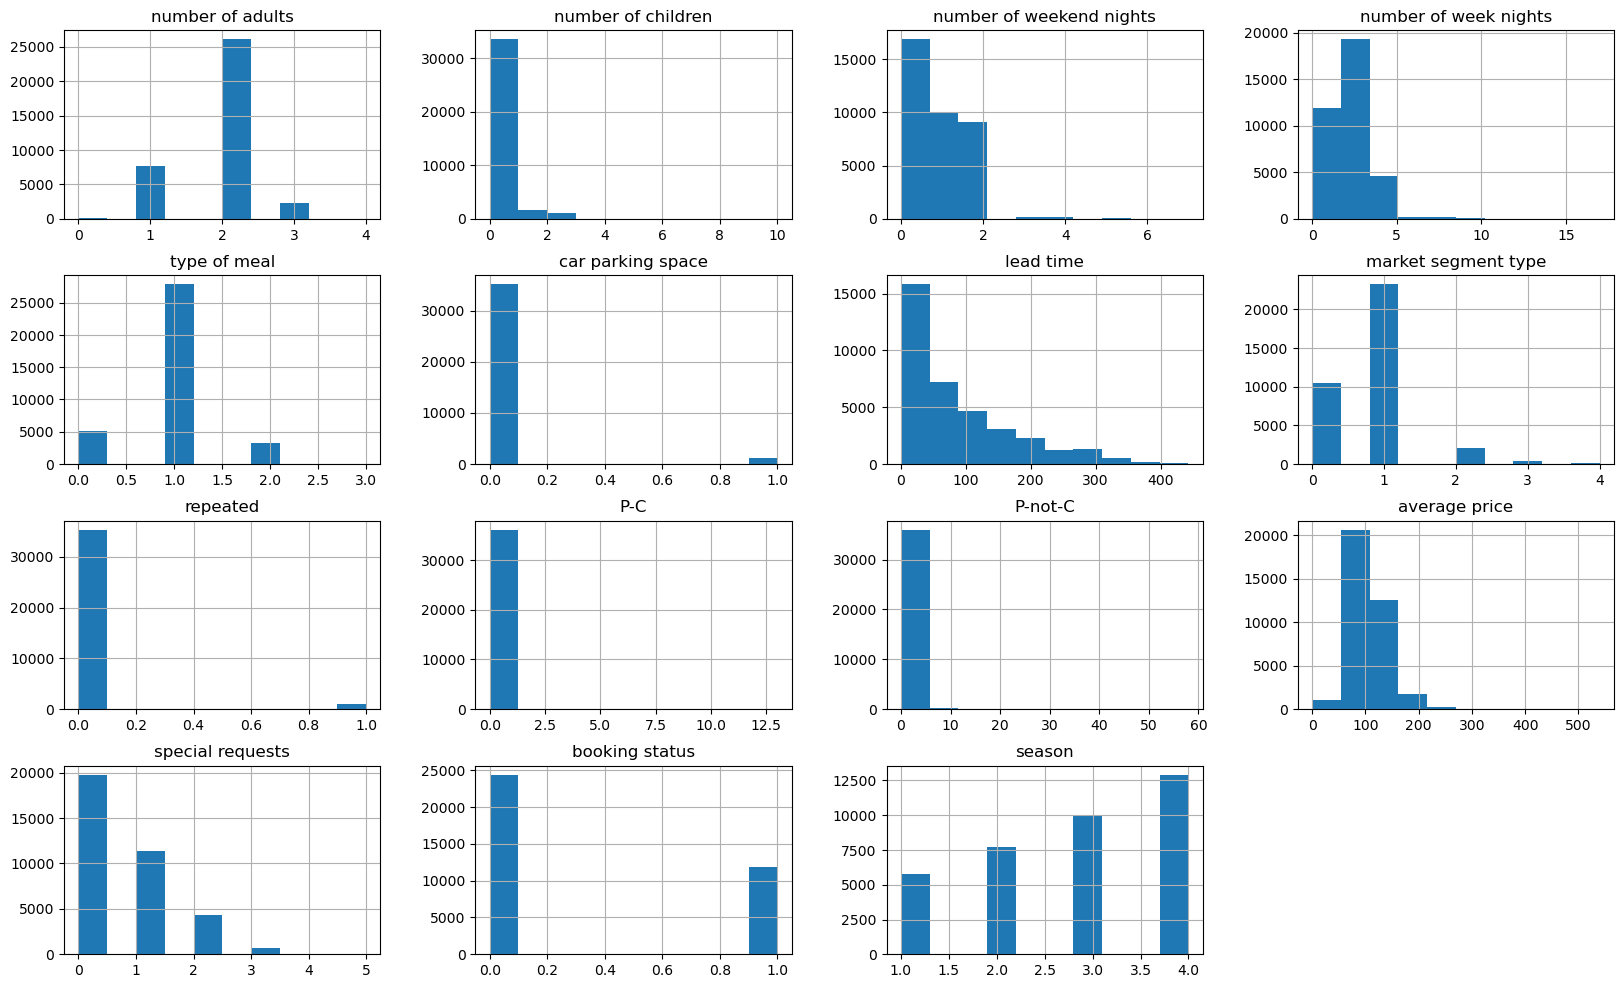

In [21]:
data.hist(figsize=(20, 12))

Ящики с усами по количественным переменным

В этой части выбросов совсем немного

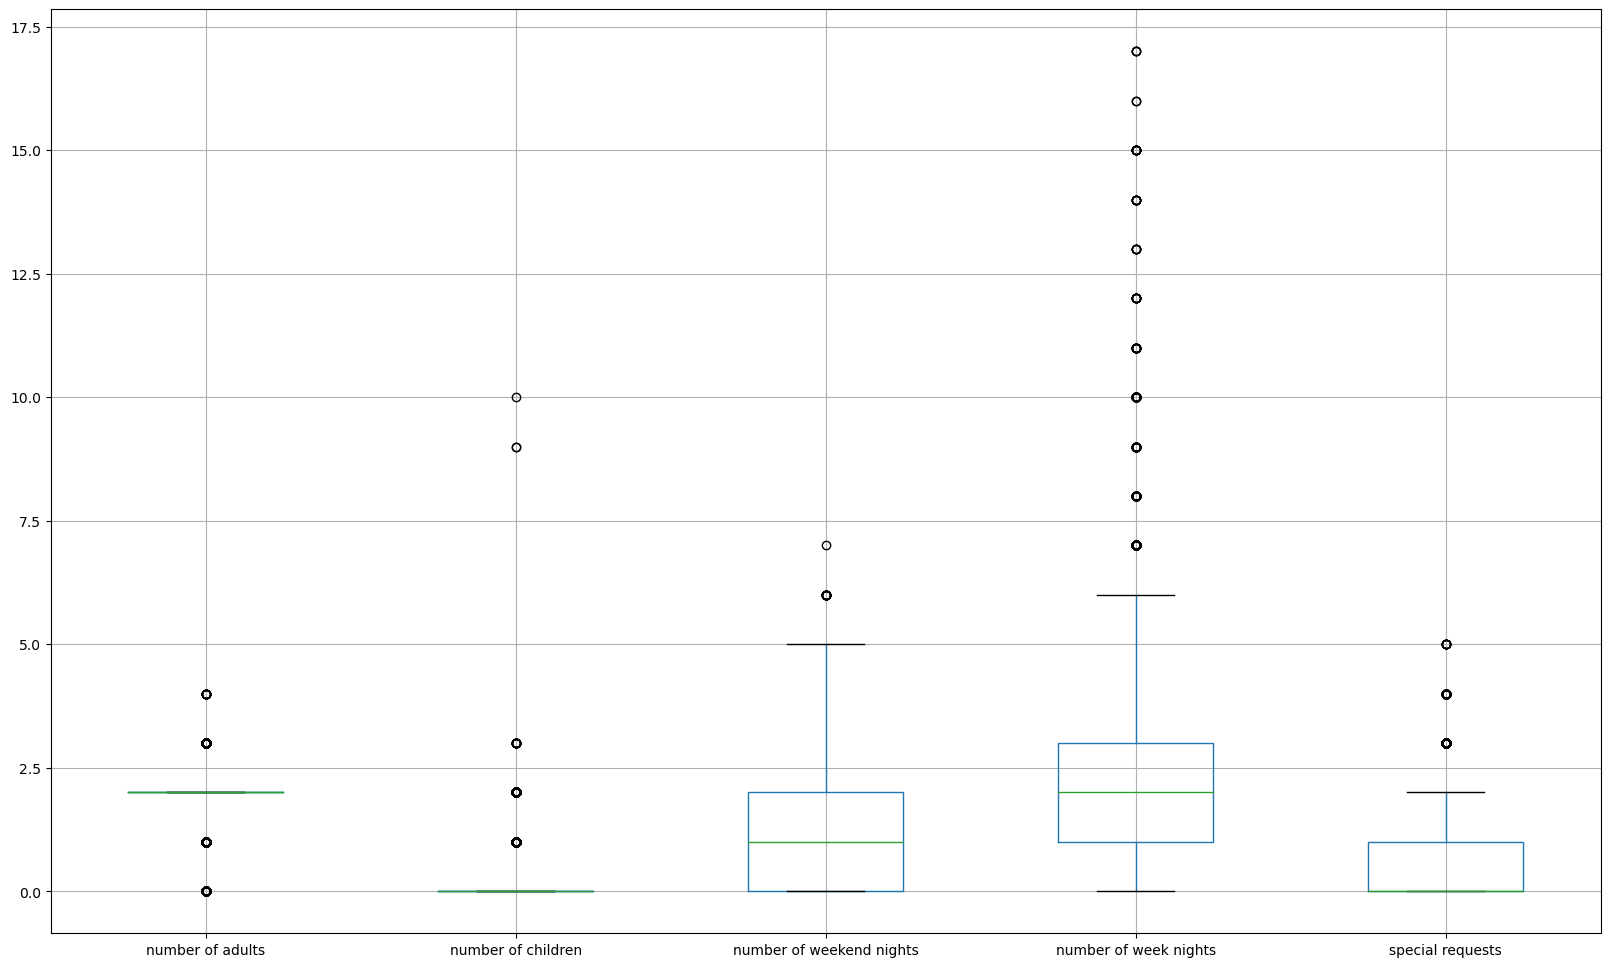

In [22]:
data[['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'special requests']].boxplot(figsize=(20, 12));

Во времени между бронированием и заселением и средней цене много выбросов

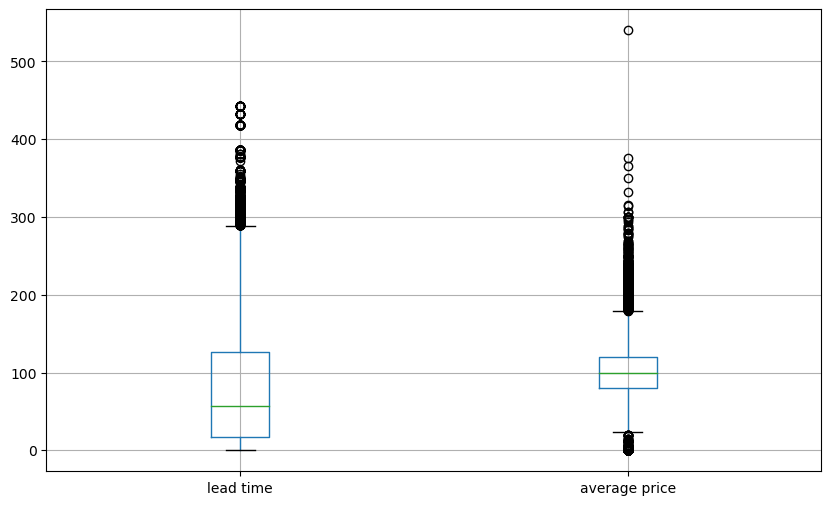

In [23]:
data[['lead time', 'average price']].boxplot(figsize=(10, 6));

In [24]:
data['average price'].describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average price, dtype: float64

In [25]:
data[data['lead time'] > (85.239851 + 85.938796*3)].shape

(377, 16)

In [26]:
data[data['average price'] > (103.421636 + 35.086469*3)].shape

(357, 16)

В среднем времени между бронью и заселением 377 выбросов, а в цене бронирования 357 - около 2% от общего количества наблюдений, можно их удалить

In [27]:
df1 = data.loc[(data['lead time'] < (85.239851 + 85.938796*3)) & (data['average price'] < (103.421636 + 35.086469*3))]

In [28]:
data.shape[0]/df1.shape[0]

1.0206463953194003

Корреляционная матрица: <br> нет больших корреляция между некатегорияальными признаками, из-за которой стоило бы переживать

<AxesSubplot:>

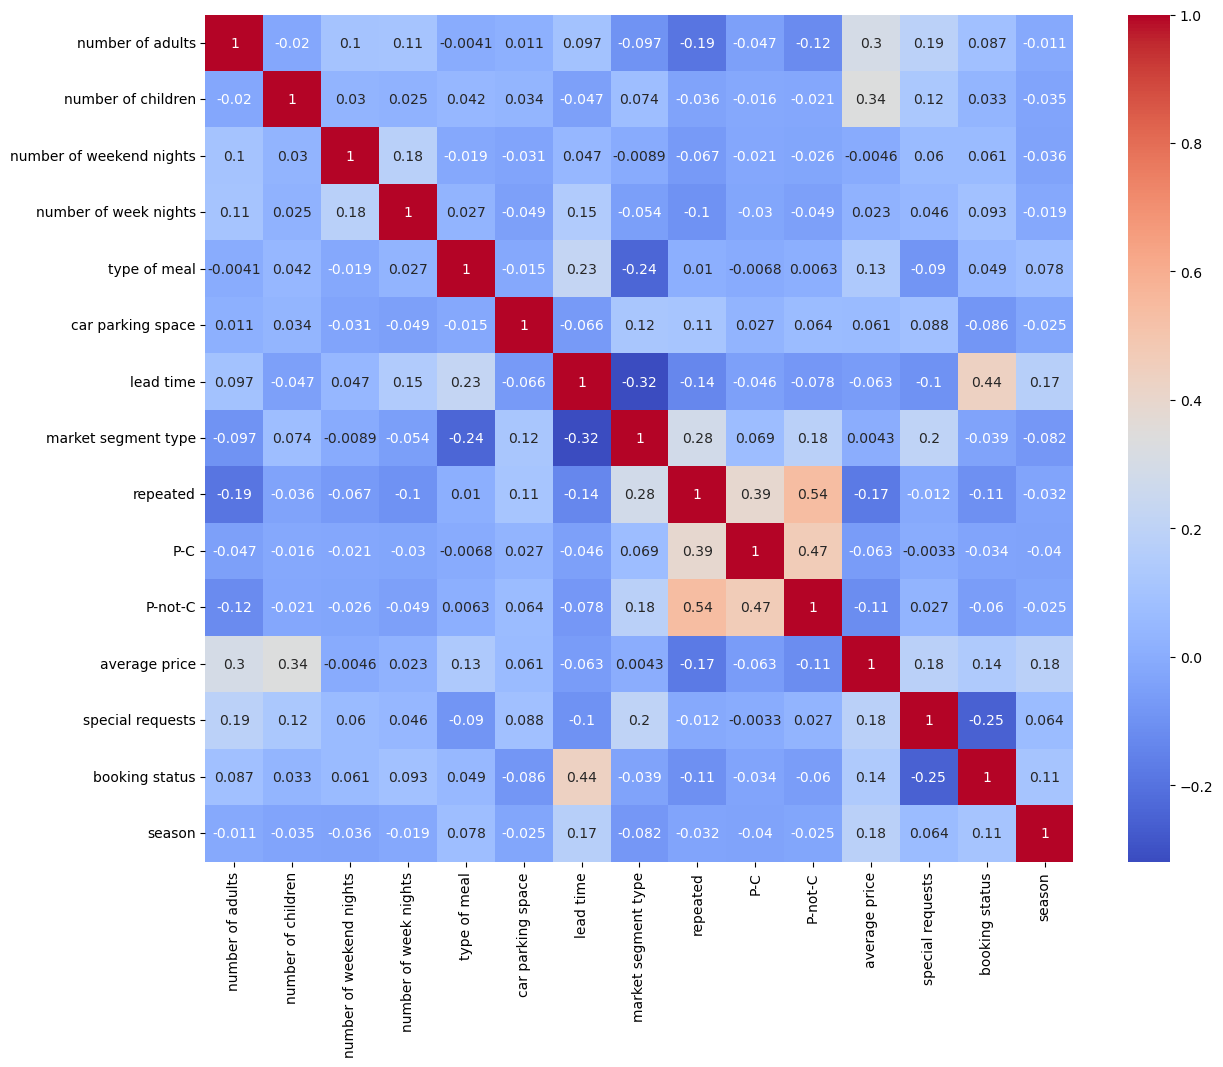

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,11))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

Что касается взаимосвязи с целевой переменной: есть положительнаая корреляция срелней силы со временем между бронированием и заселением - чем оно больше, тем выше шанс, что бронь отменят. Это можно объяснить сложностью долгосрочного планирования. <br> Еще заметна слабая-средняя корреляция с ценой бронирования - чем она выше, тем выше шанс отмены. <br> Средняя негативная связь с количеством специальных запросов может указывать нам продуманность поездки и на соответсвие отеля каким-то особенным требованиям, которым соответствует не каждый отель (например, заселение с животным)

Пропущенных переменных нет, N = 36285

In [30]:
data.isna().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
season                      0
dtype: int64

In [31]:
data.shape

(36285, 16)

Перекодирование категориальных переменных (кроме бинарных) с помощью OHE-кодирования

In [32]:
data[['type of meal', 'room type', 'market segment type', 'season']] = data[['type of meal', 'room type', 'market segment type', 'season']].astype(str)  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

In [33]:
df = pd.get_dummies(data, drop_first=True, dummy_na=False)
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_5,room type_6,room type_7,market segment type_1,market segment type_2,market segment type_3,market segment type_4,season_2,season_3,season_4
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,1,0,0,0,0,0,1
2,2,1,1,3,0,1,0,0,0,50.00,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,2,0,211,0,0,0,100.00,...,0,0,0,1,0,0,0,1,0,0
4,1,0,1,2,0,48,0,0,0,77.00,...,0,0,0,1,0,0,0,1,0,0


In [34]:
df1[['type of meal', 'room type', 'market segment type', 'season']] = df1[['type of meal', 'room type', 'market segment type', 'season']].astype(str)  
df1 = pd.get_dummies(df1, drop_first=True, dummy_na=False)

C:\Users\Карина\AppData\Local\Temp\ipykernel_4440\1957058720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['type of meal', 'room type', 'market segment type', 'season']] = df1[['type of meal', 'room type', 'market segment type', 'season']].astype(str)


Разделим датасет на тренировочную и тестовую выборки

In [35]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests', 'booking status',
       'type of meal_1', 'type of meal_2', 'type of meal_3', 'room type_2',
       'room type_3', 'room type_4', 'room type_5', 'room type_6',
       'room type_7', 'market segment type_1', 'market segment type_2',
       'market segment type_3', 'market segment type_4', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split  # функция для деления 

y = df['booking status']
X = df.drop(['booking status'], axis = 1)

y_1 = df1['booking status']
X_1 = df1.drop(['booking status'], axis = 1)

# делим в пропорции 70 к 30
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size = 0.3)
y_train_1, y_test_1, X_train_1, X_test_1 = train_test_split(y_1, X_1, test_size = 0.3)

Нормализуем данные с помощью данных с помощью min-max нормализации

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(X_train)
X_train_scaled_1 = scaler.transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

## Модели

Базовая модель <br> самый многочисленный класс

In [122]:
print((y_train == 0).sum()/y_train.shape[0], (y_test == 0).sum()/y_test.shape[0])

0.6724280483483601 0.6721477126584604


baseline accuracy aka NIR на трейне и тесте составила 67%

Я буду обучать логистическую регрессию, случайный лес и градиентный бустинг. Все эти модели - классификаторы и подходят для моей задачи.

### Логистическая регрессия

модель со стандартным порогом

In [201]:
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики

log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость, 
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17079
           1       0.74      0.62      0.67      8320

    accuracy                           0.80     25399
   macro avg       0.78      0.76      0.77     25399
weighted avg       0.80      0.80      0.80     25399

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7317
           1       0.73      0.62      0.67      3569

    accuracy                           0.80     10886
   macro avg       0.78      0.75      0.76     10886
weighted avg       0.80      0.80      0.80     10886



accuracy составила 0.8, притом sensitivity (0.62) заметно ниже, видны проблемы с предсказанием позитивного класса

In [203]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регурялизации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]
grid_search_1 = GridSearchCV(
    estimator=linear_model.LogisticRegression(random_state=1, max_iter=1000), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_1.fit(X_train_scaled, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_1.score(X_test_scaled, y_test)))
y_test_pred = grid_search_1.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))

Wall time: 6min 43s
accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.67
Наилучшие значения гиперпараметров: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}


In [206]:
log_reg = linear_model.LogisticRegression(
    random_state=1, #генератор случайных чисел
    max_iter=1000, #количество итераций на сходимость,
    C = 0.5, penalty = 'l2', solver = 'liblinear'
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17079
           1       0.74      0.61      0.67      8320

    accuracy                           0.80     25399
   macro avg       0.78      0.75      0.76     25399
weighted avg       0.80      0.80      0.80     25399

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7317
           1       0.74      0.61      0.67      3569

    accuracy                           0.80     10886
   macro avg       0.78      0.75      0.76     10886
weighted avg       0.80      0.80      0.80     10886



с оптимизацией параметров результат почти не изменился

подберем оптимальный порог, чтобы найти баланс между предсказанием положительного и негативного классов

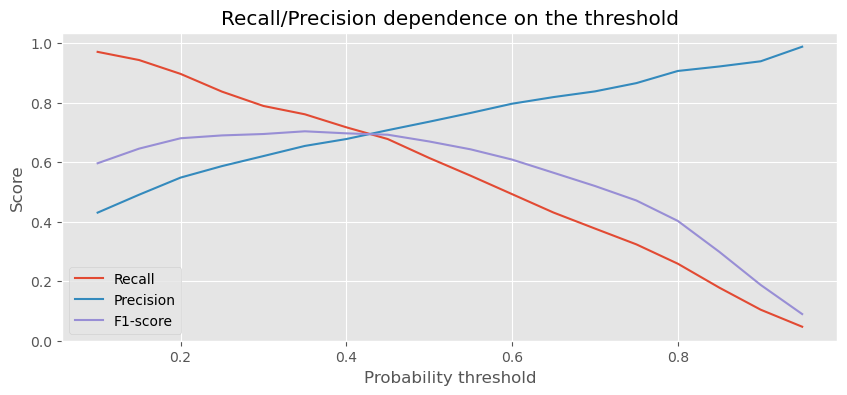

In [207]:
y_test_proba_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
plt.grid(alpha=1)
ax.legend();

In [208]:
threshold_opt = 0.43
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.70      0.69      0.69      3569

    accuracy                           0.80     10886
   macro avg       0.77      0.77      0.77     10886
weighted avg       0.80      0.80      0.80     10886



то же самое, но без выбросов

In [157]:
log_reg.fit(X_train_scaled_1, y_train_1)

y_train_pred = log_reg.predict(X_train_scaled_1)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train_1, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled_1)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test_1, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     16980
           1       0.73      0.60      0.66      7905

    accuracy                           0.80     24885
   macro avg       0.78      0.75      0.76     24885
weighted avg       0.80      0.80      0.80     24885

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      7209
           1       0.73      0.59      0.65      3457

    accuracy                           0.80     10666
   macro avg       0.77      0.74      0.76     10666
weighted avg       0.79      0.80      0.79     10666



In [159]:
threshold_opt = 0.43
y_test_proba_pred = log_reg.predict_proba(X_test_scaled_1)[:, 1]
y_test_proba_pred = pd.Series(y_test_proba_pred)
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_test_1, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7209
           1       0.70      0.68      0.69      3457

    accuracy                           0.80     10666
   macro avg       0.77      0.77      0.77     10666
weighted avg       0.80      0.80      0.80     10666



Чуть выросла accuracy, упал precision и вырос recall - лучше стал предсказываться позитивный класс, но результаты все еще очень скромные. Результаты по модели без выбросов чуть хуже

### Случайный лес

In [198]:
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17079
           1       0.99      0.99      0.99      8320

    accuracy                           0.99     25399
   macro avg       0.99      0.99      0.99     25399
weighted avg       0.99      0.99      0.99     25399

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7317
           1       0.87      0.79      0.83      3569

    accuracy                           0.89     10886
   macro avg       0.89      0.87      0.88     10886
weighted avg       0.89      0.89      0.89     10886



Видно сильное переобучение. Подберем гиперпараметры с помощью RandomizedSearchCV

'n_estimators' - количество деревьев в лесу

'min_samples_leaf' - минимальное количество объектов в листе

'max_depth': максимальная глубина дерева

'criterion' - критерий разделения

In [215]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'n_estimators': list(range(80, 200, 30)),
                       'criterion': ['gini', 'entropy'],
                       'max_features':['log2', 'sqrt'], 
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(class_weight = {0:1, 1:2}, # балансируем выборку
                                              random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1, 
    
)  

random_search_forest.fit(X_train_scaled, y_train) 
y_train_pred = random_search_forest.predict(X_train_scaled)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(random_search_forest.score(X_test_scaled, y_test)))
y_test_pred = random_search_forest.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

f1_score на обучающем наборе: 0.85
accuracy на тестовом наборе: 0.87
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'n_estimators': 110, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 35, 'criterion': 'entropy'}


In [216]:
rf = ensemble.RandomForestClassifier(n_estimators = 110, min_samples_leaf = 5, max_features = 'sqrt', max_depth = 31, criterion = 'gini', class_weight = {0:1, 1:2}, random_state=42)

#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     17079
           1       0.84      0.86      0.85      8320

    accuracy                           0.90     25399
   macro avg       0.89      0.89      0.89     25399
weighted avg       0.90      0.90      0.90     25399

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7317
           1       0.80      0.82      0.81      3569

    accuracy                           0.87     10886
   macro avg       0.85      0.86      0.86     10886
weighted avg       0.87      0.87      0.87     10886



Метрики намного лучше, чем у регрессии. Все еще проседаает чувствительность. Модель с оптимизацией гиперпарметров чуть хуже показывает себя на тестовой выборке, но здесь нет переобучения, как в базовой модели.

## Градиентный бустинг

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train_scaled, y_train)

y_train_pred = rf.predict(X_train_scaled)
y_pred = gb.predict(X_test_scaled)

# Посмотрим на основные метрики классификации
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17079
           1       0.99      0.99      0.99      8320

    accuracy                           0.99     25399
   macro avg       0.99      0.99      0.99     25399
weighted avg       0.99      0.99      0.99     25399

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7317
           1       0.81      0.69      0.75      3569

    accuracy                           0.85     10886
   macro avg       0.84      0.81      0.82     10886
weighted avg       0.84      0.85      0.84     10886



Видим сильное переобучение, результаты не лучше, чем у случайного леса.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble #ансамбли
from sklearn import metrics

param_distributions = {'n_estimators': [100, 200, 300],
                        'max_depth': [3, 5, 7, 9, 12],
                    'learning_rate': [0.1, 0.01, 0.001]
              }
            
random_search_xg = RandomizedSearchCV(
    estimator=ensemble.GradientBoostingClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1, 
    
)  
random_search_xg.fit(X_train_scaled, y_train) 

NameError: name 'random_search_forest' is not defined

In [45]:

y_train_pred = random_search_xg.predict(X_train_scaled)
y_test_pred = random_search_xg.predict(X_test_scaled)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17047
           1       0.99      0.98      0.98      8352

    accuracy                           0.99     25399
   macro avg       0.99      0.99      0.99     25399
weighted avg       0.99      0.99      0.99     25399

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7349
           1       0.86      0.79      0.82      3537

    accuracy                           0.89     10886
   macro avg       0.88      0.86      0.87     10886
weighted avg       0.89      0.89      0.89     10886



Все еще сильное переобучение. На тесте метрики почти одинааковы со случайным лесом

Вывод: лучше всех себя показал случайный лес с оптимизированными гиперпараметрами. Здесь самые высокие accuracy (0.87), precision (0.80), recall (0.82). Нет переобучения и большого разрыва между качеством предсказания позитивного и негативного классов. 